## Achilles Saxby
- Data Analysis Chapter
- Final Lesson

### Various Analysis Covered in this Chapter
- Creating Hypothesis for Statistical Testings
- Visual Analysis
- Statistical Analysis

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Creating Hypothesis for Statistical Testings

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Do diets help lose more fat than the exercise?
- Experimental setup: you have a test and a control sample.

Null Hypothesis: Exercising makes you lose more weight than dieting does.

"The mean weight lost by the population in the test sample that was exercising is greater than or equal to the mean weight lost by the control sample that did not exercise and only went into dieting."

- $H_0$ => $Mean_W(exercise) >= Mean_W(diet)$

Alternate Hypothesis: Dieting makes you lose more weight than Exercising does.

"The mean weight lost by the population in the test sample that was exercising is less than the mean weight lost by the control sample that went into dieting."

- $H_a$ => $Mean_W(exercise) < Mean_W(diet)$

Significance Level
- Significance Level - 0.05 or 5%

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Do American trust the president?
- POLL RESULTS: On May 16, 1994, Newsweek reported the results of a public opinion poll that asked: “From everything you know about Bill Clinton, does he have the honesty and integrity you expect in a president?” (p.23). Poll surveyed 518 adults and 233, or 0.45 of them answered yes.

Null Hypothesis: Yes, the American population does trust the president.

"The proportion of the American population that trusts the president is greater than or equal to the proportion of the American population that does not trust the president."

- $H_0$ => $Percentage(Trust) >= Percentage(Does-Not-Trust)$

Alternate Hypothesis: No, the American population does not trust the president.

"The proportion of the American population that trusts the president is less than the proportion of the American population that does not trust the president."

- $H_a$ => $Percentage(Trust) < Percentage(Does-Not-Trust)$

Significance Level
- Significance Level - 0.05 or 5%

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Effectiveness of nicotine patches to quit smoking.
- Experimental setup: measure cessation rates for smokers randomly assigned to use a nicotine patch versus a placebo patch.

Null Hypothesis: Nicotine patches do not help quit smoking.

"The cessation rates for smokers using a nicotine patch is less than or equal to the cessation rates for smokers who use placebo patches."

- $H_0$ => $Cessation_n <= Cessation_p$

Alternate Hypothesis: Nicotine patches help quit smoking !!

"The cessation rates for smokers using a nicotine patch is greater than the cessation rates for smokers who use placebo patches."

- $H_a$ => $Cessation_n > Cessation_p$

Significance Level
- Significance Level - 0.05 or 5%
- $Cessation_n = Cessation-Nicotine$
- $Cessation_p = Cessation-Placebo$

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Quantify the danger of smoking for pregnant women.
- Experimemtal setup: measure IQ of children at ages 1, 2, 3, and 4 years of age.

Null Hypothesis: Smoking during pregnancy does not harm the IQ of children after childbirth !!

"The IQ of children at ages 1, 2, 3 and 4 to mothers who smoked during pregnancy is higher than the IQ of the children of the same age groups to mothers who did not smoke during pregnancy."

- $H_0$ => $IQ(smoking) > IQ(non-smoking)$

Alternate Hypothesis: Smoking during pregnancy harms the IQ of children after childbirth !!

"The IQ of children at ages 1, 2, 3 and 4 to mothers who smoked during pregnancy is less than or equal to the IQ of the children of the same age groups to mothers who did not smoke during pregnancy."

- $H_a$ => $IQ(smoking) <= IQ(non-smoking)$

Significance Level
- Significance Level - 0.05 or 5%

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Visual and Statistical Analyses
- Visual Representation
- Statistical Analyses

#### Problem Statement :
- Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution.
- Use 2 tests: KS, AD, KL, chisq (even though we have not talked about it in detail yet) to do this.
- Test at the Normal and a least one other distributions (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)

In [9]:
import datetime 
import calendar

my_date = datetime.datetime(2019, 1 , 2)
calendar.day_name[my_date.weekday()]

'Wednesday'

In [10]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import csv

%matplotlib inline
%pylab inline

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [11]:
datestring = '201505'

In [12]:
df = pd.read_csv("sample_datasets/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,415,5/1/2015 00:00:11,5/1/2015 00:07:06,477,W 41 St & 8 Ave,40.756405,-73.990026,442,W 27 St & 7 Ave,40.746647,-73.993915,17012,Subscriber,1981.0,1
1,1523,5/1/2015 00:00:28,5/1/2015 00:25:52,293,Lafayette St & E 8 St,40.730287,-73.990765,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,17390,Customer,NaN,0
2,642,5/1/2015 00:00:52,5/1/2015 00:11:35,380,W 4 St & 7 Ave S,40.734011,-74.002939,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1990.0,1
3,367,5/1/2015 00:00:48,5/1/2015 00:06:55,537,Lexington Ave & E 24 St,40.740259,-73.984092,280,E 10 St & 5 Ave,40.733320,-73.995101,14788,Subscriber,1978.0,1
4,2734,5/1/2015 00:00:51,5/1/2015 00:46:26,426,West St & Chambers St,40.717548,-74.013221,327,Vesey Pl & River Terrace,40.715338,-74.016584,21068,Subscriber,1956.0,2


In [13]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [14]:
df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'age'],
      dtype='object')

In [15]:
df_age = df.age
df_age.dropna(inplace= True)

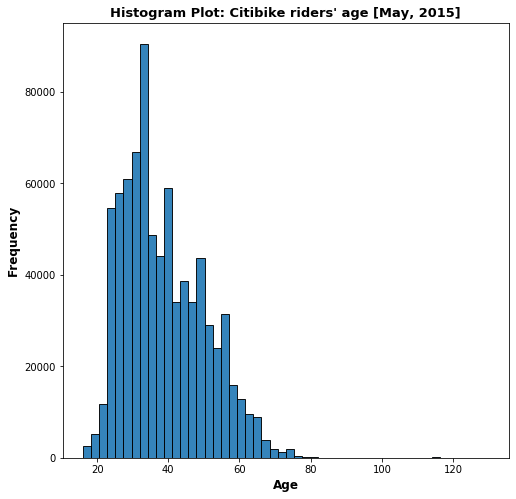

In [16]:
plt.figure(figsize=(8,8))
plt.hist(df_age, 50, alpha=0.9, ec='black')
plt.xlabel("Age", fontweight = 'bold', size = 12)
plt.ylabel('Frequency', fontweight = 'bold', size = 12)
plt.title("Histogram Plot: Citibike riders' age [May, 2015]", fontweight = 'bold',size=13)
plt.show()

Mean: 38.74926173854593 Sigma: 11.458815771856012


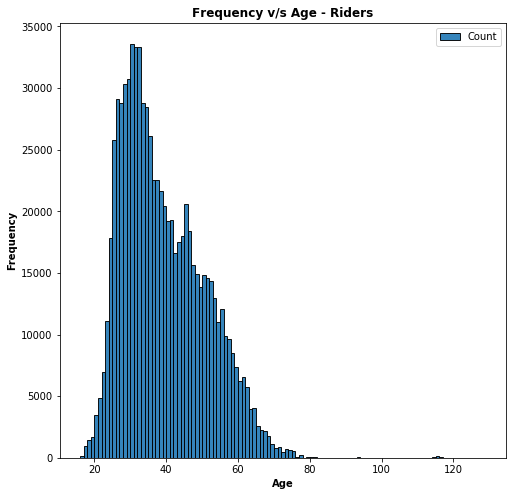

In [17]:
print ('Mean:', df.age.mean(), 'Sigma:', df.age.std())
                                                                                            
bins = np.arange(df.age.min(), df.age.max(), 1)

plt.figure(figsize=(8,8))
plt.hist(df.age, bins, label='Count', alpha = 0.9, ec='black')
plt.title('Frequency v/s Age - Riders', fontweight = 'bold')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.legend()
plt.show()

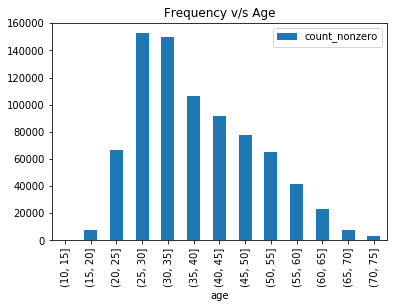

In [18]:
bins = np.arange(10,80,5)
plot = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero])\
.plot(kind='bar', legend=True, title = 'Frequency v/s Age')

#### Using the Normal Distribution

Null hypothesis: The ages of citibike users are drawn from a Gaussian Distribution.
- $H_0 => F_a - F_G = 0$

Alternate Hypothesis: The ages of citibike users are not drawn from a Gaussian Distribution
- $H_a => F_a - F_G != 0$

Significance Level
- Significance Level = 0.05 / 5%

Descriptions
- $F_a$ = F_Age
- $F_G$ = F_Gaussian

#### Using the KS-Test

##### KS-Test with Normal Distribution
- First entry is the observations that we are trying to determine the distribution of CDF is normal distribution here:
- A standard normal will have a mean = 0
- Standard Deviation = 1

In [32]:
#Check this before going to the next cell
scipy.stats.kstest?

Signature:
scipy.stats.kstest(
    rvs,
    cdf,
    args=(),
    N=20,
    alternative='two-sided',
    mode='approx',
)
Docstring:
Perform the Kolmogorov-Smirnov test for goodness of fit.

This performs a test of the distribution F(x) of an observed
random variable against a given distribution G(x). Under the null
hypothesis the two distributions are identical, F(x)=G(x). The
alternative hypothesis can be either 'two-sided' (default), 'less'
or 'greater'. The KS test is only valid for continuous distributions.

Parameters
----------
rvs : str, array or callable
    If a string, it should be the name of a distribution in `scipy.stats`.
    If an array, it should be a 1-D array of observations of random
    variables.
    If a callable, it should be a function to generate random variables;
    it is required to have a keyword argument `size`.
cdf : str or callable
    If a string, it should be the name of a distribution in `scipy.stats`.
    If `rvs` is a string then `cdf` can be False

In [20]:
scipy.stats.kstest(df['age'].values,'norm', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.10248543296647195, pvalue=0.0)

- Here, the p-value is coming up to 0.0
- The significance value we have set is 0.05, hence we reject the Null Hypothesis that the distribution of the CitiBike users is drawn from the Normal/Gaussian Distribution

#### Using the Chi-Square Test

##### Chi-Square Test with Normal Distribution

In [21]:
scipy.stats.chisquare(df['age'].values)

Power_divergenceResult(statistic=2691989.2279713918, pvalue=0.0)

- Here, the p-value is coming up to 0.0
- The significance value we have set is 0.05, hence we reject the Null Hypothesis that the distribution of the CitiBike users is drawn from the Normal/Gaussian Distribution
- Also, the statistic shown here is a very high number which is close to infinite and which entails that the counting is stopped

#### Using the Logistic Distribution

Null hypothesis: The ages of citibike users are drawn from a Logistic Distribution.
- $H_0 => F_a - F_L = 0$

Alternate Hypothesis: The ages of citibike users are not drawn from a Logistic Distribution
- $H_a => F_a - F_L != 0$


Significance Level
- Significance Level = 0.05 / 5%

Descriptions
- $F_a$ = F_Age
- $F_L$ = F_Logistic

#### Using Anderson-Darling Test

##### Anderson-Darling Test with Logistic Distribution
- Anderson-Darling test is for data coming from a particular distribution
- Here we have used the Logistic Distribution
- First input is the array of sample data that we want to determine the distribution of
- Second input is the distribution that we are comparing the sample distribution to so as to find the good fit

In [22]:
scipy.stats.anderson(df['age'].values, dist='logistic')

AndersonResult(statistic=10391.35783835745, critical_values=array([0.426, 0.563, 0.66 , 0.769, 0.906, 1.01 ]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ,  0.5]))

- For this Anderson test I have obtained a statistic of a high number, which it is going to stop counting because it is too high. 
- My alpha is 0.05 which I have set as the significance level.
- I am going to reject the H0 if it is above the third entry in the critical values -> 0.66. 
- We reject the null hypotheses that ages of citibike riders are drawn from the logistic distribution.

#### Using the KS-Test

##### KS-Test with Logistic Distribution
- First entry is (rvs) which is the observations that we are trying to determine the distribution of
- CDF is logistic distribution here

In [23]:
scipy.stats.kstest(df['age'].values,'logistic', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.17781816774797352, pvalue=0.0)

- Here, the p-value is coming up to 0.0
- The significance value we have set is 0.05, hence we reject the Null Hypothesis that the distribution of the CitiBike users is drawn from the Logistic Distribution

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Visual Analyses
- Visual Representation and Analysis

#### IDEA
- The average trip duration of the customer is more than that of the subscriber which indicates that a single time user tries to make the best use of his investment.

#### Null Hypothesis ($H_0$)
The mean trip duration of single time user (customer) over a week is less than or equal to the mean trip duration of the subscribers over a week.
- $H_0$ : T(customer) <= T(subscriber)

#### Alternate Hypothesis ($H_a$)
The mean trip duration of single time user (customer) over a week in more than the mean trip duration of the subscribers over a week
- $H_a$: T(customer) > T(subscriber)

#### Significance Level
- Significance level (α) = 0.05/5%

In [24]:
import datetime 
import calendar

my_date = datetime.datetime(2019, 1 , 2)
calendar.day_name[my_date.weekday()]

'Wednesday'

In [25]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
datestring_2 = '201606'

In [33]:
df_2 = pd.read_csv("sample_datasets/" + datestring_2 + '-citibike-tripdata.csv')
df_2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [34]:
df_2['date'] = pd.to_datetime(df_2['starttime'])

In [35]:
df_2.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [36]:
df_2.drop(['starttime','stoptime','start station id',
       'start station name','start station latitude',
       'start station longitude','end station id','end station name',
       'end station latitude','end station longitude','bikeid',
       'birth year','gender'], axis = 1, inplace = True)

In [37]:
df_2.head()

,tripduration,usertype,date
0,1470,Subscriber,2016-06-01 00:00:18
1,229,Subscriber,2016-06-01 00:00:20
2,344,Subscriber,2016-06-01 00:00:21
3,1120,Subscriber,2016-06-01 00:00:28
4,229,Subscriber,2016-06-01 00:00:53


In [38]:
df_2.describe()

,tripduration
count,1.460318e+06
mean,9.897580e+02
std,7.589179e+03
min,6.100000e+01
25%,4.050000e+02
50%,6.760000e+02
75%,1.143000e+03
max,3.129291e+06


- A bird's eye view on how the two usertype's are related in the bigger scope of things

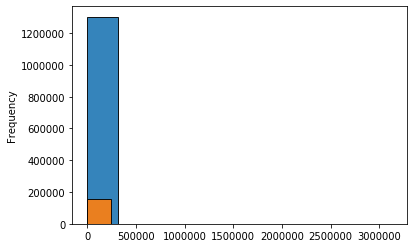

In [39]:
s = 60

subs = (df_2["tripduration"][df_2["usertype"] == "Subscriber"])  # blue
cust = (df_2["tripduration"][df_2["usertype"] == "Customer"])    # green

subs.plot(kind = 'hist', ec='black', alpha = 0.9, figsize=(6,4))
cust.plot(kind = 'hist', ec='black', alpha = 0.9, figsize=(6,4))

Text(-0.5, -450, 'Figure : Number of Customers/Subscribers')

<Figure size 360x360 with 0 Axes>

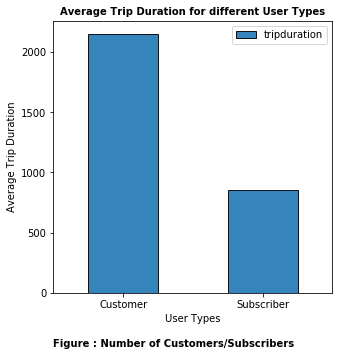

In [40]:
fig=pl.figure(figsize(5,5))
plotted = df_2.groupby(['usertype']).mean()
plotted.plot(kind='bar',rot=360, ec='black', alpha = 0.9)
pl.xlabel('User Types')
pl.ylabel('Average Trip Duration')
pl.title('Average Trip Duration for different User Types',fontsize = 10, fontweight = 'bold')
pl.text(-0.5,-450, 'Figure : Number of Customers/Subscribers',fontsize = 10, fontweight = 'bold')

- The average trip duration for the Customer is more than the Subscriber.
- The reason we will prove is due to the fact that the customer tries to maximize the use of citibikes.

In [41]:
subscriber = df_2['tripduration'][df_2['usertype'] == 'Subscriber'].groupby([df_2['date'].dt.weekday ]).mean()
customer = df_2['tripduration'][df_2['usertype'] == 'Customer'].groupby([df_2['date'].dt.weekday ]).mean()
subscriber = subscriber.to_frame()
customer = customer.to_frame()
subscriber

,tripduration
date,
0,829.153867
1,816.969227
2,861.103150
3,819.571240
4,842.312846
5,919.327838
6,911.917002


Text(0, -300, 'Figure : Average Trip Duration of Customers/Subscribers plotted against each other')

<Figure size 576x576 with 0 Axes>

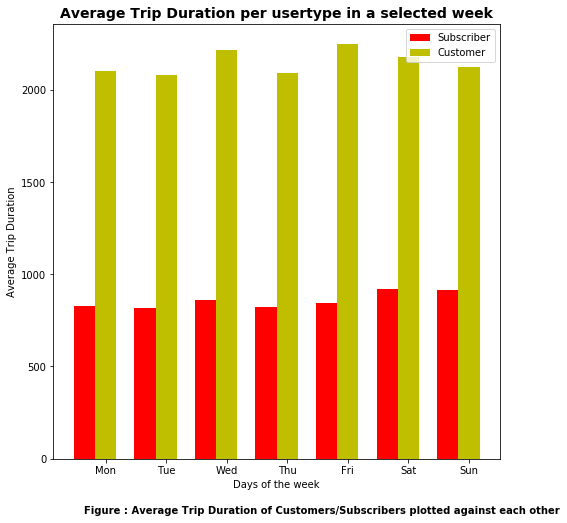

In [42]:
fig=pl.figure(figsize(8,8))
fig, ax = pl.subplots()
width = 0.35  

rects1 = ax.bar(subscriber.index.values , subscriber.tripduration, width, color='r')
rects2 = ax.bar(customer.index.values + width, customer.tripduration, width, color='y')

ax.set_xlabel('Days of the week')
ax.set_ylabel('Average Trip Duration')
ax.set_title('Average Trip Duration per usertype in a selected week', fontsize = 14, fontweight = 'bold')
ax.set_xticks(customer.index.values + width)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)
ax.legend((rects1[0], rects2[0]), ('Subscriber', 'Customer'), loc = 'upper right')
ax.text(0,-300, 'Figure : Average Trip Duration of Customers/Subscribers plotted against each other',\
        fontsize = 10, fontweight = 'bold')

In [43]:
dataset = df_2.groupby(['usertype'])
dataset.head()

,tripduration,usertype,date
0,1470,Subscriber,2016-06-01 00:00:18
1,229,Subscriber,2016-06-01 00:00:20
2,344,Subscriber,2016-06-01 00:00:21
3,1120,Subscriber,2016-06-01 00:00:28
4,229,Subscriber,2016-06-01 00:00:53
34,1406,Customer,2016-06-01 00:05:07
39,1476,Customer,2016-06-01 00:05:23
52,1458,Customer,2016-06-01 00:07:02
56,1432,Customer,2016-06-01 00:07:21
59,1145,Customer,2016-06-01 00:07:51


In [44]:
p = df_2.groupby(['usertype']).mean()
p.head()

,tripduration
usertype,
Customer,2152.122233
Subscriber,849.905440


In [45]:
std_p = df_2.groupby(['usertype']).std()
std_p.head()

,tripduration
usertype,
Customer,16261.379406
Subscriber,5703.300908


In [46]:
# Calculating means
subscriber = df_2['tripduration'][df_2['usertype'] == 'Subscriber'].mean()
customer = df_2['tripduration'][df_2['usertype'] == 'Customer'].mean()

In [47]:
# Checking for equal standard deviation
sub_std = df_2['tripduration'][df_2['usertype'] == 'Subscriber'].std()
cus_std = df_2['tripduration'][df_2['usertype'] == 'Customer'].std()
sub_std == cus_std

False

In [48]:
sub = df_2['tripduration'][df_2['usertype'] == 'Subscriber'].groupby([df_2['date'].dt.weekday ]).mean()
cus = df_2['tripduration'][df_2['usertype'] == 'Customer'].groupby([df_2['date'].dt.weekday ]).mean()
total = df_2['tripduration'].groupby([df_2['date'].dt.weekday ]).mean()
sub = sub.to_frame()
cus = cus.to_frame()
total = total.to_frame()
total

,tripduration
date,
0,930.807704
1,892.920660
2,942.399714
3,902.188451
4,970.449934
5,1223.579789
6,1192.574404


In [49]:
#T-Test
stats.ttest_ind(sub, cus, equal_var= False)

Ttest_indResult(statistic=array([-43.70336847]), pvalue=array([4.77027351e-13]))

- Since p value is less than 5% we can reject the null hypothesis

In [50]:
# Refered https://github.com/AllenDowney/CompStats/blob/master/effect_size.ipynb 
# Concept reference: http://www.leeds.ac.uk/educol/documents/00002182.htm

def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / numpy.sqrt(pooled_var)
    return d

In [51]:
effect_size = CohenEffectSize(cus, sub)

In [52]:
effect_size[0]

23.36043306527813

- Here we notice that the size of the difference between the samples is really large

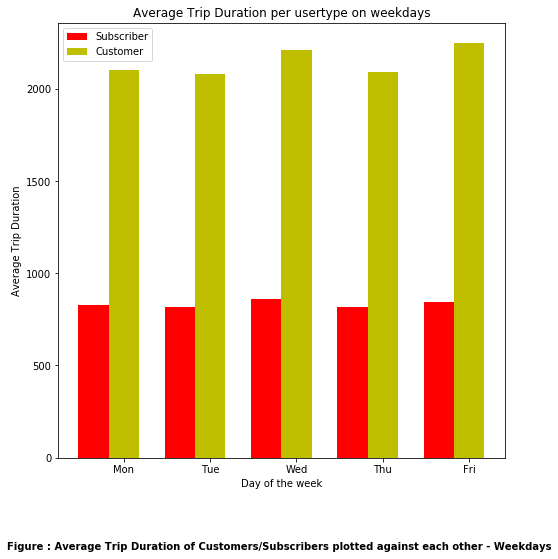

In [53]:
#fig=pl.figure(figsize(8,8))

ax = pl.subplot(111)

#pl.xlim(0,3000)
width = 0.35  
rects1 = ax.bar(sub.index.values[:5] , sub.tripduration[:5], width, color='r')

rects2 = ax.bar(cus.index.values[:5] + width, cus.tripduration[:5], width, color='y')



# add some text for labels, title and axes ticks
ax.set_ylabel('Average Trip Duration')
ax.set_xlabel('Day of the week')
ax.set_title('Average Trip Duration per usertype on weekdays')
ax.set_xticks(cus.index.values[:5] + width)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri'], fontsize=10)
ax.text(-1,-500, 'Figure : Average Trip Duration of Customers/Subscribers plotted against each other - Weekdays',\
        fontsize = 10, fontweight = 'bold')

ax.legend((rects1[0], rects2[0]), ('Subscriber', 'Customer'))

#fig=pl.figure(figsize(8,8))

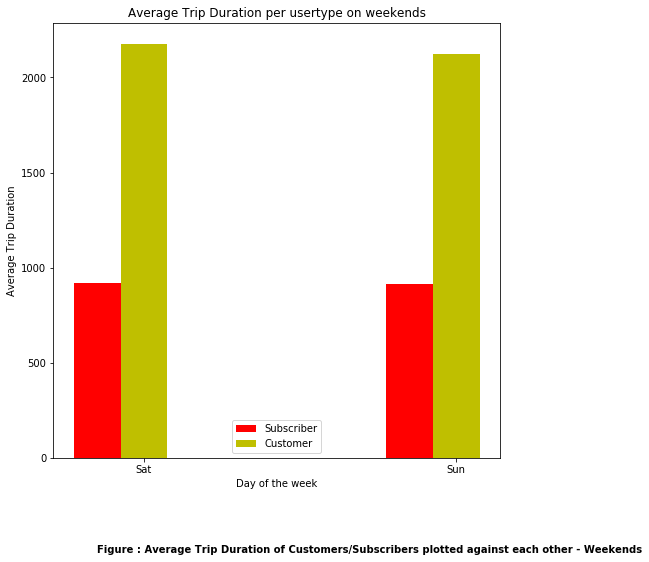

In [54]:
ax = pl.subplot(111)

#pl.xlim(0,3000)
width = 0.15  
rects1 = ax.bar(sub.index.values[5:] , sub.tripduration[5:], width, color='r')

rects2 = ax.bar(cus.index.values[5:] + width, cus.tripduration[5:], width, color='y')



# add some text for labels, title and axes ticks
ax.set_ylabel('Average Trip Duration')
ax.set_xlabel('Day of the week')
ax.set_title('Average Trip Duration per usertype on weekends')
ax.set_xticks(cus.index.values[5:] + width)
ax.xaxis.set_ticklabels(['Sat', 'Sun'], fontsize=10)
ax.text(5,-500, 'Figure : Average Trip Duration of Customers/Subscribers plotted against each other - Weekends',\
        fontsize = 10, fontweight = 'bold')

ax.legend((rects1[0], rects2[0]), ('Subscriber', 'Customer'))

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------